# Imports

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from itertools import cycle
from IPython.display import Image
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from __future__ import division
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.cm as cm
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report
# from catboost import CatBoostRegressor, CatBoostClassifier, Pool

/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Modeling

## Open and sort dataframe

In [2]:
with open('pipeline.pkl', 'rb') as handle:
    data = pickle.load(handle)
data.head()

,artist,platinum,followers,popularity,popularity_log,followers_log
253,Post Malone,1,3792488,100,4.605170,15.148533
36,Drake,1,19729716,99,4.595120,16.797636
110,Kendrick Lamar,1,8813295,94,4.543295,15.991772
625,Cardi B,1,2257130,93,4.532599,14.629605
65,J. Cole,1,5074440,93,4.532599,15.439727


In [3]:
df = data.drop(columns=['popularity_log','followers_log'])
df = df.sort_values(by=['followers'],ascending=False)
df.head()

,artist,platinum,followers,popularity
36,Drake,1,19729716,99
640,Nicki Minaj,1,10431818,91
110,Kendrick Lamar,1,8813295,94
95,Kanye West,1,7259123,90
861,Wiz Khalifa,0,6767452,86


In [4]:
df.head()

,artist,platinum,followers,popularity
36,Drake,1,19729716,99
640,Nicki Minaj,1,10431818,91
110,Kendrick Lamar,1,8813295,94
95,Kanye West,1,7259123,90
861,Wiz Khalifa,0,6767452,86


In [5]:
scaled_features = df.copy()
col_names = ['popularity', 'followers']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features.head()

/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,artist,platinum,followers,popularity
36,Drake,1,5.174199,1.780824
640,Nicki Minaj,1,2.300463,0.909925
110,Kendrick Lamar,1,1.800220,1.236512
95,Kanye West,1,1.319866,0.801063
861,Wiz Khalifa,0,1.167903,0.365613


## Use the train/test info below for all models

In [6]:
y,X=dmatrices('platinum ~ followers + popularity',data=df,return_type='dataframe')
xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(X, y, test_size=0.2, random_state=1234)

# Logistic Regression

#### Question for JB/CS if my test size is large, the accuracy will increase, right?

#### Should I randomly shuffle the train sets below?

In [7]:
# 1. Fix the below to make sure it does not include repeat variable names
# 2. Leave changes to variables seperate in each model

In [8]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Could be a typical function for classifying:

def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest2 = cross_validation.train_test_split(x, y, test_size=0.2, random_state=1234)
    ytrain2=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain2)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain2)
    test_acc=clf.score(xtest,ytest2)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.36
Test Data Accuracy:     0.45
[[0 6]
 [0 5]]


Precision:              nan
Recall:                 0.00


/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in long_scalars


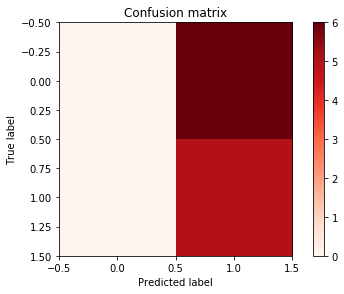

In [9]:
log_clf=LogisticRegression()
train_score(log_clf,X,y)

## ROC Curve

Text(0,0.5,'TPR')

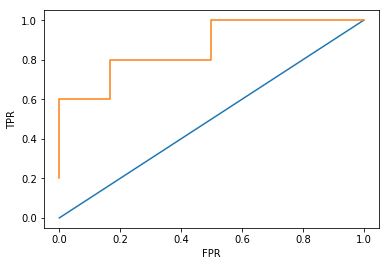

In [10]:
log = LogisticRegression()
log.fit(xtrain,np.ravel(ytrain))
y_score=log.predict_proba(xtest)[:,1]

fpr, tpr,thres = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [11]:
tpr

array([ 0.2,  0.6,  0.6,  0.8,  0.8,  1. ,  1. ])

In [12]:
thres

array([ 0.65956375,  0.60232587,  0.57890769,  0.56271056,  0.55020785,
        0.54734702,  0.5005835 ])

In [13]:
1-thres

array([ 0.34043625,  0.39767413,  0.42109231,  0.43728944,  0.44979215,
        0.45265298,  0.4994165 ])

In [14]:
df.head()

,artist,platinum,followers,popularity
36,Drake,1,19729716,99
640,Nicki Minaj,1,10431818,91
110,Kendrick Lamar,1,8813295,94
95,Kanye West,1,7259123,90
861,Wiz Khalifa,0,6767452,86


# Gradient Descent

## Does GD implement theta, l1,l2, and combo?

# SVM

## Question for JB/CS: run for loop to find most efficient gamma?

### SVC with linear kernel

In [15]:
# fit linear model
model_svm = svm.SVC(kernel='linear')
ytrain3 = np.ravel(ytrain)
model_svm.fit(xtrain, ytrain3)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
# predict out of sample
y_pred = model_svm.predict(xtest)
# check accuracy
accuracy_score(ytest,y_pred)

0.72727272727272729

In [17]:
model_svm.coef_

array([[  8.81961171e-13,   3.43857551e-01,   3.16017133e+01]])

In [18]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(ytest, y_pred)

print('Average precision-recall score:', round(average_precision,2))

Average precision-recall score: 0.63


Text(0.5,1,'2-class Precision-Recall curve: AP=0.63')

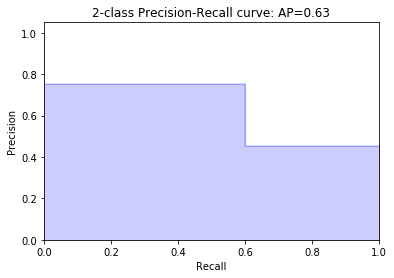

In [19]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(ytest, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

### SVC with RBF kernel

In [20]:
# fit rbf model
model_svm2 = svm.SVC(kernel='rbf')
model_svm2.fit(xtrain, ytrain3)
y_pred2 = model_svm2.predict(xtest)
y_pred2

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [21]:
accuracy_score(ytest,y_pred2)

0.54545454545454541

In [22]:
confusion_matrix(ytest,y_pred2)

array([[6, 0],
       [5, 0]])

Text(0.5,1,'2-class Precision-Recall curve: AP=0.63')

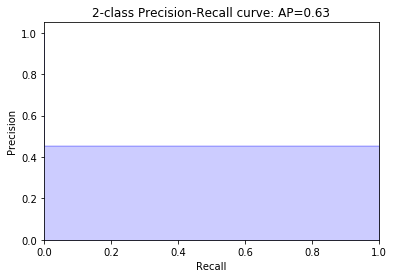

In [23]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(ytest, y_pred2)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

### SVC with poly kernel

## SVM

In [24]:
y,X=dmatrices('platinum ~ followers + popularity',data=df,return_type='dataframe')

In [25]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

In [26]:
linearsvc = LinearSVC()
quick_test_afew_times(linearsvc, X, y)

/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.44545454545454544

# Naive Bayes

In [27]:
y,X=dmatrices('platinum ~ followers + popularity',data=df,return_type='dataframe')
xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(X, y, test_size=0.2, random_state=1234)

## Binomial NB

In [28]:
model = naive_bayes.BernoulliNB()
ytrain = np.ravel(ytrain)
model.fit(xtrain, ytrain)

print("Accuracy: %.3f"% accuracy_score(ytest, model.predict(xtest)))
print(classification_report(ytest, model.predict(xtest)))

Accuracy: 0.545
             precision    recall  f1-score   support

        0.0       0.55      1.00      0.71         6
        1.0       0.00      0.00      0.00         5

avg / total       0.30      0.55      0.39        11



/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Multinomial NB

In [29]:
# this would work the best because the outcome of one album going platinum, will not affect
# the outcome of another album going platinum

model = naive_bayes.MultinomialNB()
model.fit(xtrain, ytrain)

print("Accuracy: %.3f"% accuracy_score(ytest, model.predict(xtest)))
print(classification_report(ytest, model.predict(xtest)))

Accuracy: 0.818
             precision    recall  f1-score   support

        0.0       0.75      1.00      0.86         6
        1.0       1.00      0.60      0.75         5

avg / total       0.86      0.82      0.81        11



In [30]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Could be a typical function for classifying:

def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest2 = cross_validation.train_test_split(x, y, test_size=0.2, random_state=1234)
    ytrain2=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain2)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain2)
    test_acc=clf.score(xtest,ytest2)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.76
Test Data Accuracy:     0.82
[[6 0]
 [2 3]]


Precision:              0.75
Recall:                 1.00


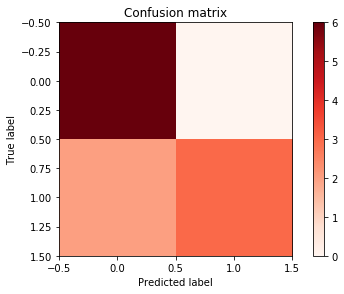

In [31]:
log_clf=naive_bayes.MultinomialNB()
train_score(log_clf,X,y)

In [32]:
model.fit(xtrain, ytrain)
print(classification_report(ytest, model.predict(xtest)))

             precision    recall  f1-score   support

        0.0       0.75      1.00      0.86         6
        1.0       1.00      0.60      0.75         5

avg / total       0.86      0.82      0.81        11



# SVCs Part 2

## Linear SVC

In [33]:
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import scale

xtrain = scale(xtrain)
xtest = scale(xtest)

model = LinearSVC()
model.fit(xtrain, ytrain)

print("Accuracy: %.3f"% accuracy_score(ytest, model.predict(xtest)))
print(classification_report(ytest, model.predict(xtest)))

Accuracy: 0.727
             precision    recall  f1-score   support

        0.0       0.71      0.83      0.77         6
        1.0       0.75      0.60      0.67         5

avg / total       0.73      0.73      0.72        11



## SVC

In [34]:
model = SVC()
model.fit(xtrain, ytrain)

print("Accuracy: %.3f"% accuracy_score(ytest, model.predict(xtest)))
print(classification_report(ytest, model.predict(xtest)))

Accuracy: 0.818
             precision    recall  f1-score   support

        0.0       0.75      1.00      0.86         6
        1.0       1.00      0.60      0.75         5

avg / total       0.86      0.82      0.81        11



# Decision Trees

In [35]:
y,X=dmatrices('platinum ~ followers + popularity',data=df,return_type='dataframe')
xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(X, y, test_size=0.2, random_state=1234)

## How to pick the right number of trees

In [36]:
for i in range(1,20,1):
    decisiontree = DecisionTreeClassifier(max_depth=i)
    print(i,quick_test_afew_times(decisiontree, X, y))

1 0.845454545455
2 0.809090909091
3 0.836363636364
4 0.827272727273
5 0.854545454545
6 0.790909090909
7 0.818181818182
8 0.827272727273
9 0.818181818182
10 0.790909090909
11 0.790909090909
12 0.790909090909
13 0.781818181818
14 0.763636363636
15 0.8
16 0.845454545455
17 0.809090909091
18 0.845454545455
19 0.9


## This is random every time, right?

In [37]:
for i in range(1,10,1):
    randomforest = RandomForestClassifier(n_estimators=i)
    yrf = np.ravel(y)
    print(i, quick_test_afew_times(randomforest, X, yrf))

1 0.863636363636
2 0.781818181818
3 0.818181818182
4 0.827272727273
5 0.890909090909
6 0.845454545455
7 0.818181818182
8 0.872727272727
9 0.890909090909


In [38]:
decisiontree = DecisionTreeClassifier()
quick_test_afew_times(decisiontree, X, y)

0.79090909090909078

In [39]:
linearsvc = LinearSVC(loss='hinge')
quick_test_afew_times(linearsvc, X, yrf)

0.42727272727272725

In [40]:
svc = SVC()
quick_test_afew_times(svc, X, yrf)

0.59999999999999998

In [41]:
s2 = SVC()
X2 = (0.5-X) * 2
quick_test_afew_times(s2, X2, yrf)

0.73636363636363644